In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

/Users/chiemelienwanisobi/miniconda3/envs/chidi_trade/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [153]:
RISK_FREE_RATE  = 0.05
MONTH_IN_YEAR = 12
class CAPM():
    def __init__(self, stocks, start, end):
        self.stocks = stocks
        self.data = None
        self.start = start
        self.end = end

    def download_data(self):
        stock_data = {}

        for stock in self.stocks:
            data = yf.download(stock, start=self.start, end=self.end,
                            period='d', progress=False)['Close']
            stock_data[stock] = data
        self.data =  pd.DataFrame(stock_data)
        return self.data

    

    def initialize(self):
        stock_data = self.download_data()
        stock_data = stock_data.resample('M').last()
        data_1 = pd.DataFrame(
            {'s_adjclose': stock_data[self.stocks[0]], 'm_adjclose': stock_data[self.stocks[1]]})

        data_1[['s_returns', 'm_returns']] = np.log(
            data_1[['s_adjclose', 'm_adjclose']]/data_1[['s_adjclose', 'm_adjclose']].shift(1))
        data_1 = data_1.dropna()
        self.data = data_1

        return stock_data

    def calculate_beta(self):
        cov_mat = np.cov(self.data['s_returns'], self.data['m_returns'])
        beta = cov_mat[0,1]/cov_mat[1,1]
        return beta 

    def regression(self):
        beta, alpha = np.polyfit(self.data['m_returns'], self.data['s_returns'], deg = 1)
        expected_return = RISK_FREE_RATE + beta * (self.data.m_returns.mean()*MONTH_IN_YEAR - RISK_FREE_RATE)
        print(f"Beta from Regression is: {beta}")
        print(f"Alpha from Regression is: {alpha}")
        print(f"Beta from Covariance Method is : {self.calculate_beta()}")
        print(f"Expected Return is {expected_return}")
        self.plot_regression(alpha, beta)
    
    def plot_regression(self, alpha, beta):
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.scatter(self.data.m_returns, self.data.s_returns, label = 'Data Points')
        ax.plot(self.data['m_returns'].to_numpy(), np.array(
            beta * self.data['m_returns'] + alpha), color = 'red', label = 'CAPM Line')
        ax.legend()
        ax.set_title('Capital Asset Pricing Model, Finding Alpha & Beta')
        ax.set_ylabel('Stock Returns $R_a$')
        ax.set_xlabel('Market Returns $R_m$')
        ax.grid(False)
        plt.show()


Beta from Regression is: 2.0612382046738817
Alpha from Regression is: 0.015507237472812305
Beta from Covariance Method is : 2.0612382046738826
Expected Return is 0.06349474940406745


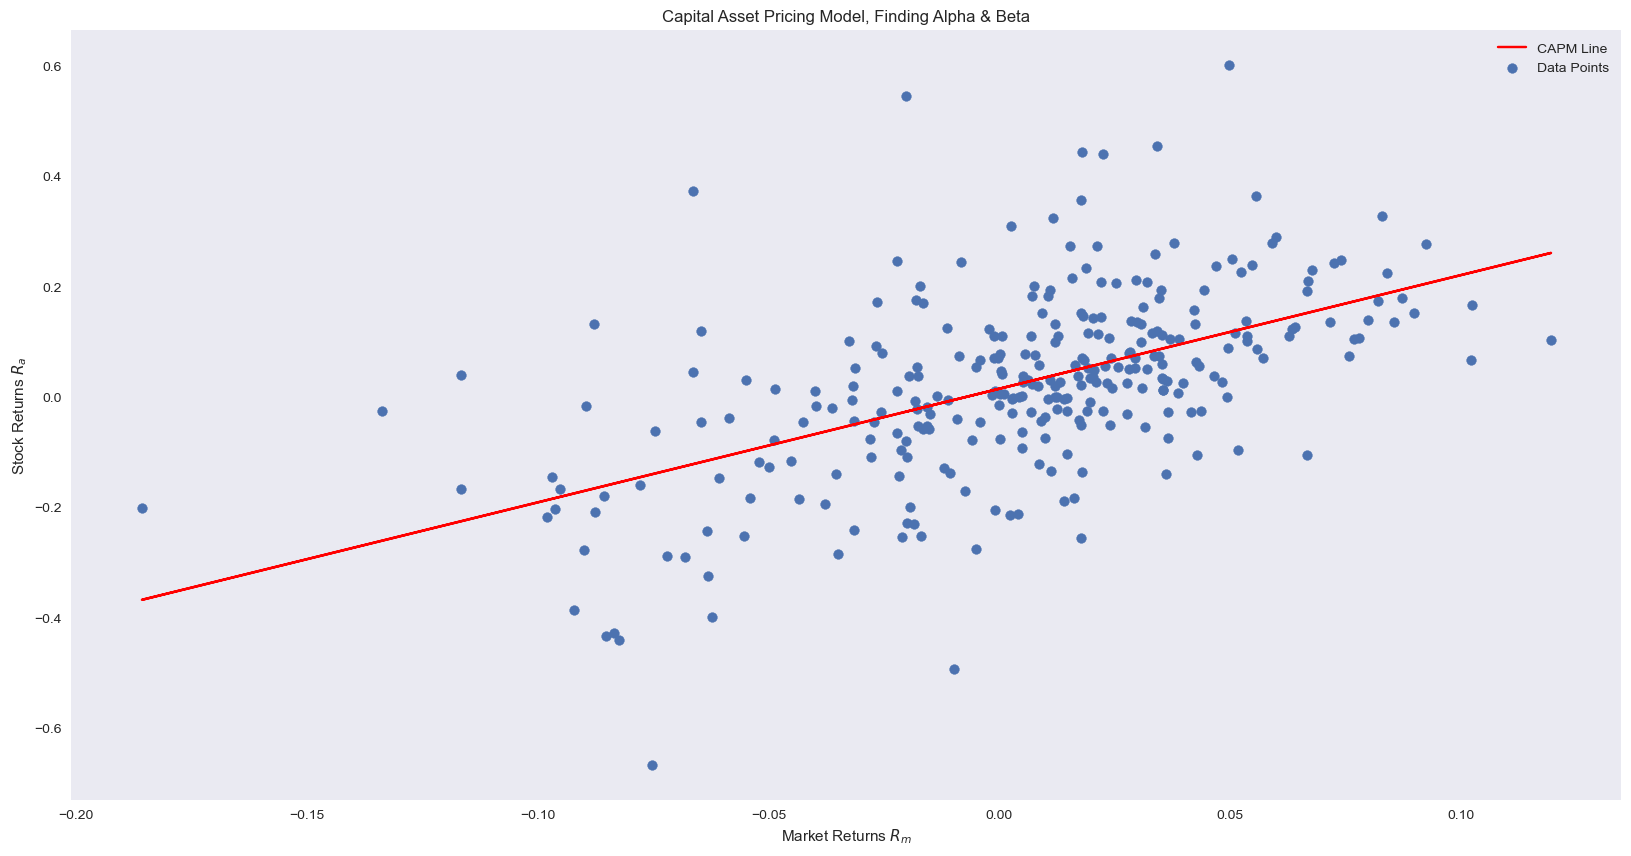

In [157]:
stocks = ['NVDA', '^GSPC']
cap = CAPM(stocks, '2000-01-01', datetime.today())

dd = cap.initialize()
cap.regression()

In [146]:
print('$R_m$')

$R_m$
